<a href="https://colab.research.google.com/github/Shwethaa-R/Deep-Learning-Activity-3/blob/main/AlexNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlexNet CNN Model

Write a program to implement the AlexNet model (Note : You can use any publically
available dataset for testing). While implementing you have to show following things:
1. Display sample input and output images (at least 10 images).
2. Display the total images in the database, size of the image, no of classes in the database.
3. Display the first convolution function kernel filter coefficient values
4. Display the training accuracy / training error
5. Display the testing accuracy


In [1]:
import numpy as np
from PIL import Image
import os
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

The dataset is obtained from the paper: Multi-class Weather Dataset for Image Classification.

Published: 13-09-2018
|
Version 1
|
DOI:
10.17632/4drtyfjtfy.1
Contributor:
Gbeminiyi Ajayi

Link to the dataset: https://data.mendeley.com/datasets/4drtyfjtfy/1

In [2]:
# mounting Google Drive to upload the dataset
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# uploading the dataset and normalizing the values in range 0-1, with target size (300,150)
path = '/content/drive/My Drive/Classification Dataset'
path_train = path + '/Train'
path_test = path + '/Test'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path_train, target_size=(300,150), class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(300,150), class_mode='categorical')

Found 904 images belonging to 4 classes.
Found 221 images belonging to 4 classes.


In [4]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 300, 150, 3)
Batch Size for Output Image :  (32, 4)
Image Size of first image :  (300, 150, 3)
Output of first image :  (4,)


In [5]:
# getting the total number of images and the number of images in each class
# the four classes are: shiny, rainy, cloudy and sunrise
directories = os.listdir(path)
total_images = 0
for i in range(len(directories)):
  path_to_images = path + '/' + directories[i]
  final_path = os.listdir(path_to_images)
  print("There are totally {} classes".format(len(final_path)))
  print("The number of {} images in each class is as follows:".format(directories[i]))
  for j in range(len(final_path)):
    s = len(os.listdir(os.path.join(path_to_images,final_path[j])))
    total_images += s
    print("Number of images in Class {}: {}".format(j, s))
print("The total number of images: {}".format(total_images))

There are totally 4 classes
The number of Train images in each class is as follows:
Number of images in Class 0: 240
Number of images in Class 1: 172
Number of images in Class 2: 204
Number of images in Class 3: 288
There are totally 4 classes
The number of Test images in each class is as follows:
Number of images in Class 0: 60
Number of images in Class 1: 43
Number of images in Class 2: 49
Number of images in Class 3: 69
The total number of images: 1125


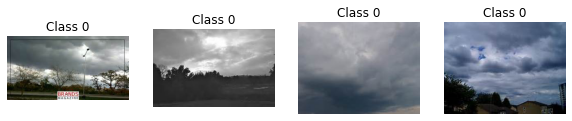

In [6]:
# plotting few images from class 0
fig , axs = plt.subplots(1,4 ,figsize = (10,5))
for i in range(4):
  path_class = os.path.join(path_to_images,final_path[0])
  l = os.listdir(path_class)
  u = os.path.join(path_class,l[i])
  img = Image.open(u)
  data = np.asarray(img)
  axs[i].imshow(data)
  axs[i].set_title('Class 0')
  axs[i].axis('off')

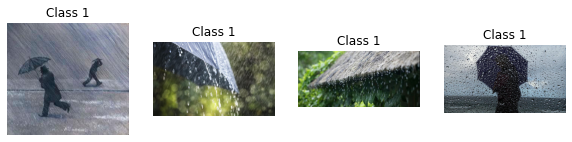

In [7]:
# plotting few images from class 1
fig , axs = plt.subplots(1,4 ,figsize = (10,5))
for i in range(4):
  path_class = os.path.join(path_to_images,final_path[1])
  l = os.listdir(path_class)
  u = os.path.join(path_class,l[i])
  img = Image.open(u)
  data = np.asarray(img)
  axs[i].imshow(data)
  axs[i].set_title('Class 1')
  axs[i].axis('off')

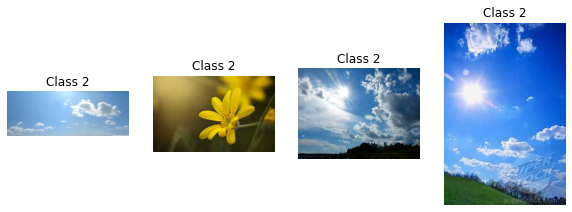

In [8]:
# plotting few images from class 2
fig , axs = plt.subplots(1,4 ,figsize = (10,5))
for i in range(4):
  path_class = os.path.join(path_to_images,final_path[2])
  l = os.listdir(path_class)
  u = os.path.join(path_class,l[i])
  img = Image.open(u)
  data = np.asarray(img)
  axs[i].imshow(data)
  axs[i].set_title('Class 2')
  axs[i].axis('off')

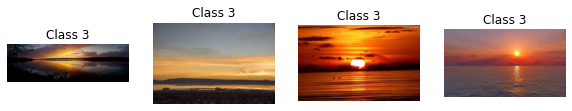

In [9]:
# plotting few images from class 3
fig , axs = plt.subplots(1,4 ,figsize = (10,5))
for i in range(4):
  path_class = os.path.join(path_to_images,final_path[3])
  l = os.listdir(path_class)
  u = os.path.join(path_class,l[i])
  img = Image.open(u)
  data = np.asarray(img)
  axs[i].imshow(data)
  axs[i].set_title('Class 3')
  axs[i].axis('off')

In [10]:
# the CNN model as defined by AlexNet
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4)(X_input)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2)(X)
    
    X = Conv2D(256,(5,5),padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2)(X)
    
    X = Conv2D(384, (3,3) , padding = 'same')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2)(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(4,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')

    return model

[[-1.67619605e-02  6.47167675e-03 -3.53216566e-03 -1.98370665e-02
  -1.89097673e-02 -2.10880786e-02  1.69495400e-02  7.58701935e-03
   1.50052272e-03  1.48147848e-02  1.25503819e-02]
 [-1.87690016e-02 -1.81914512e-02 -3.09668481e-03  1.13238636e-02
   7.28534907e-03  5.44013456e-04 -7.29640014e-03  1.17464010e-02
   1.38939824e-02  1.44480634e-02  8.36614147e-03]
 [-1.82307400e-02 -4.92933765e-03  1.95455421e-02  1.63770281e-03
   9.23701562e-03  1.44794788e-02  3.82030383e-03  1.69264283e-02
   1.56733077e-02 -2.70211883e-03 -6.92165084e-03]
 [ 1.73409451e-02  2.07483768e-03  1.84159111e-02 -2.48087198e-03
  -4.81439754e-04 -3.40531580e-03  1.90245192e-02 -2.07949895e-02
  -1.85776986e-02 -1.33200670e-02  1.37752425e-02]
 [-3.74477357e-04  1.39676593e-03 -1.49279311e-02  8.74566659e-03
  -2.45326944e-03 -1.58406049e-03  2.84840167e-03  4.73496877e-03
   1.37183815e-05 -2.06471384e-02  1.59408245e-02]
 [ 4.96375374e-03  1.65910106e-02 -1.63682811e-02 -2.00258605e-02
  -1.44204097e-02  

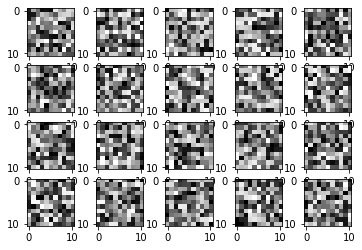

In [11]:
# displaying the first 20 filter coefficient values
model = Sequential()
x = Conv2D(filters=96,kernel_size=(11,11),input_shape=train[0][0].shape[1:])

model.add(x)
x_w = x.get_weights()[0][:,:,0,:]
for i in range(1,21):
      plt.subplot(4,5,i)
      print(x_w[:,:,i])
      print("\n")
      plt.imshow(x_w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [12]:
alex = AlexNet(train[0][0].shape[1:])

In [13]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 150, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 35, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 35, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 73, 35, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 17, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 17, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 17, 256)       1024

In [14]:
# compiling the CNN model using Adam optimizer
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [15]:
# fitting the model to run it on the given dataset
alex_fit = alex.fit_generator(train,epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
29/29 [==============================] - 346s 11s/step - loss: 19.8815 - accuracy: 0.4648
Epoch 2/10
29/29 [==============================] - 7s 249ms/step - loss: 0.5763 - accuracy: 0.7302
Epoch 3/10
29/29 [==============================] - 7s 252ms/step - loss: 0.5365 - accuracy: 0.7707
Epoch 4/10
29/29 [==============================] - 7s 253ms/step - loss: 0.5525 - accuracy: 0.7443
Epoch 5/10
29/29 [==============================] - 7s 249ms/step - loss: 0.4298 - accuracy: 0.8215
Epoch 6/10
29/29 [==============================] - 7s 251ms/step - loss: 0.4804 - accuracy: 0.8036
Epoch 7/10
29/29 [==============================] - 7s 256ms/step - loss: 0.4420 - accuracy: 0.8334
Epoch 8/10
29/29 [==============================] - 7s 260ms/step - loss: 0.4683 - accuracy: 0.7938
Epoch 9/10
29/29 [==============================] - 7s 251ms/step - loss: 0.3577 - accuracy: 0.8635
Epoch 10/10
29/29 [==============================] - 7s 264ms/step - loss: 0.3767 - accuracy: 0.853

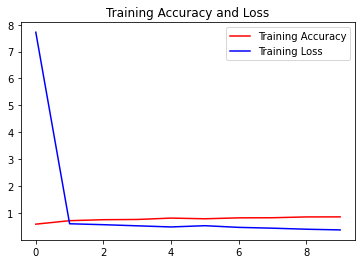

<Figure size 432x288 with 0 Axes>

In [16]:
# plotting the obtained loss and accuracy for each epoch 
acc = alex_fit.history['accuracy']
loss = alex_fit.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [17]:
# evaluate the model performance using the test dataset
preds = alex.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 63s 10s/step - loss: 0.6215 - accuracy: 0.8326
Loss = 0.6214814186096191
Test Accuracy = 0.8325791954994202
